In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense



In [23]:
data = pd.read_csv('st.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data


,ActualPrice,PredictedPrice
Date,,
2023-01-01,100.00,99.85
2023-01-02,101.23,100.34
2023-01-03,102.45,101.03
2023-01-04,103.67,102.45
2023-01-05,104.89,103.21
2023-01-06,106.12,105.01
2023-01-07,107.34,106.98
2023-01-08,108.56,108.22
2023-01-09,109.78,109.89


In [24]:
# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data['ActualPrice'].values.reshape(-1, 1))


In [25]:
# Create sequences for training
sequence_length = 10
X, y = [], []
for i in range(len(scaled_data) - sequence_length):
    X.append(scaled_data[i:i + sequence_length, 0])
    y.append(scaled_data[i + sequence_length, 0])

X, y = np.array(X), np.array(y)

In [36]:
# Split the data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]



In [38]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [39]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 0.2931
Epoch 2/50
1/1 [==============================] - 0s 18ms/step - loss: 0.2807
Epoch 3/50
1/1 [==============================] - 0s 20ms/step - loss: 0.2689
Epoch 4/50
1/1 [==============================] - 0s 15ms/step - loss: 0.2578
Epoch 5/50
1/1 [==============================] - 0s 15ms/step - loss: 0.2477
Epoch 6/50
1/1 [==============================] - 0s 14ms/step - loss: 0.2385
Epoch 7/50
1/1 [==============================] - 0s 18ms/step - loss: 0.2296
Epoch 8/50
1/1 [==============================] - 0s 13ms/step - loss: 0.2212
Epoch 9/50
1/1 [==============================] - 0s 27ms/step - loss: 0.2132
Epoch 10/50
1/1 [==============================] - 0s 21ms/step - loss: 0.2054
Epoch 11/50
1/1 [==============================] - 0s 23ms/step - loss: 0.1978
Epoch 12/50
1/1 [==============================] - 0s 19ms/step - loss: 0.1903
Epoch 13/50
1/1 [==============================] - 0s 20ms/step

In [40]:
# Make predictions
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

1/1 [==============================] - 1s 519ms/step


In [46]:

# Create a DataFrame with Date, Actual Price, and Predicted Price
result = data.iloc[-len(y_test):].copy()
result['PredictedPrice'] = predicted_prices


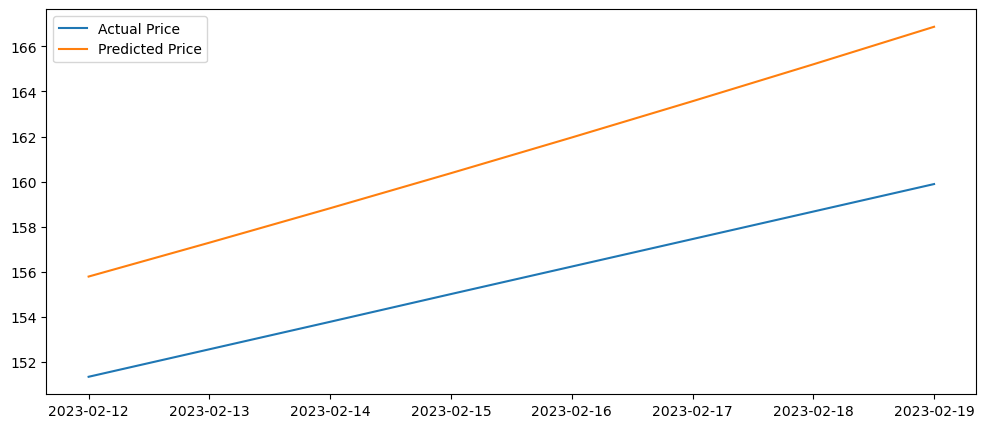

In [57]:
# Plot the actual and predicted prices
plt.figure(figsize=(12,5))
plt.plot(result.index, scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual Price')
plt.plot(result.index, result['PredictedPrice'], label='Predicted Price')
plt.legend()
plt.show()



In [45]:
# Save the result to a CSV file
result.to_csv('stock_price_predictions.csv')